# Plotting Climate Data

## What do seasonal temperatures actually look like?

Montrealers love to talk and complain about the weather. When there are vasts amounts of snow, Montrealers want Summer. When there's no snow, they complain that they can't go skiing. My hunch is that people are gnerally confused because, socially, we always refer to average values of temperature, snowfall, etc. We'll explore here if and how looking at averages can skew our understanding of climate.

You will use historical climate data for a specific weather station in Canada. Data can be downloaded for a number of stations, when available, in the date range spanning 1840-today at the web address http://climatedata.ca/download/

You can access the website manually, select a station, a date range, a file type, and download the file manually. Following that, you can upload the file to your files on the server and it will be accessible. This **will** be cumbersome. 

An easier way is to access the data through the api. Indeed, you can form the correct URL that will return the following data:
* station ID: 7086716 (Rouyn)
* Start date: Jan 1st 2020
* End date:   Dec 31st 2020
* File format: CSV

Look at the URL, saved as a string, in the climateDataURL variable. Can you identify the different parts that set that data?

In [89]:
climateDataURL = 'https://api.weather.gc.ca/collections/climate-daily/items?datetime=2020-01-01%2000:00:00/2020-12-31%2000:00:00&STN_ID=10849&sortby=PROVINCE_CODE,STN_ID,LOCAL_DATE&f=csv&limit=150000&startindex=0'

climateDataURL = https://api.weather.gc.ca/collections/climate-daily/items?datetime=2020-01-01%2000:00:00/2020-12-31%2000:00:00&STN_ID=10849&sortby=PROVINCE_CODE,STN_ID,LOCAL_DATE&f=csv&limit=150000&startindex=0


Now, we'll use the 'urlread()' function that reads the url and returns as a string. In this case, the string is a CSV file that we can store in the 'data' variable. (Remove the ; character to see what you actually downloaded. Be ready to scroll a bit.)

In [90]:
data = urlread(climateDataURL);

We can store the csv (from the 'data' variable) in a file. First choose a file name.

In [91]:
CSVFileName = 'Rouyn-test-data-2020.csv'

CSVFileName = Rouyn-test-data-2020.csv


Open the file.

In [92]:
fid = fopen(CSVFileName,'w')

fid = 6


In [93]:
fprintf(fid,'%s',data)
fclose(fid)

ans = 0


We can use the dlmread() function to read the contents of the csv file we just saved. (I'm using a previously saved version here. There's also surely a way that doesn't involve storing the file to the disk first.)

In [94]:
data2020 = dlmread('RefData/Rouyn-test-data-2020.csv',',',1,0);

A CSV file is basically a very simple version of an excel spreadsheet. We'll extract the different columns of interest. In this case:
* day
* month
* year
* max Temperature of the day
* min Temperature of the day

In [95]:
day = data2020(:,12);
month = data2020(:,19);
year  = data2020(:,18);
maxT2020 = data2020(:,4);
minT2020 = data2020(:,9);

We use the function datenum() to convert the day, month, year information to a serial day, i.e. the number of days elapsed from January 1st 0000. (See this webpage for a summary of the time functions https://wiki.octave.org/Date/Time_functions.)

In [96]:
serialday2020 = datenum(year,month,day);

Finally, we plot the daily max temperature (in red) and the daily min temperature (in blue) for the whole year 2020.

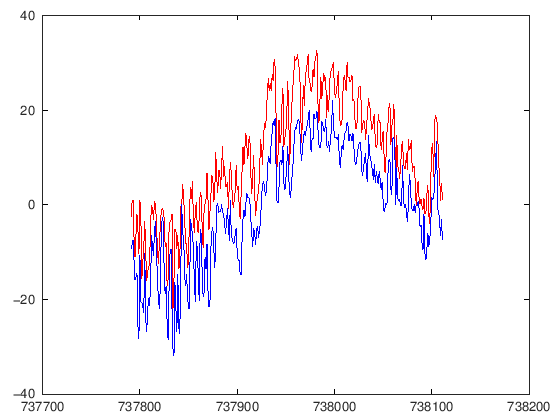

In [97]:
plot(serialday2020,maxT2020,'r-',serialday,minT2020,'b-')

Let's compare the year 2020 to the year 2000. *(It would be much easier if we'd created a function to fetch and extract the data instead of retyping everything here. Imagine if we tried to do this for 100 years!)*

In [98]:
climateDataURL = 'https://api.weather.gc.ca/collections/climate-daily/items?datetime=2000-01-01%2000:00:00/2000-12-31%2000:00:00&STN_ID=10849&sortby=PROVINCE_CODE,STN_ID,LOCAL_DATE&f=csv&limit=150000&startindex=0'

climateDataURL = https://api.weather.gc.ca/collections/climate-daily/items?datetime=2000-01-01%2000:00:00/2000-12-31%2000:00:00&STN_ID=10849&sortby=PROVINCE_CODE,STN_ID,LOCAL_DATE&f=csv&limit=150000&startindex=0


In [99]:
data = urlread(climateDataURL);

In [100]:
CSVFileName = 'Rouyn-test-data-2000.csv'

CSVFileName = Rouyn-test-data-2000.csv


In [101]:
fid = fopen(CSVFileName,'w')

fid = 6


In [102]:
fprintf(fid,'%s',data)
fclose(fid)

ans = 0


In [103]:
data2000 = dlmread('RefData/Rouyn-test-data-2000.csv',',',1,0);

In [104]:
day = data2000(:,36);
month = data2000(:,11);
year  = data2000(:,19);
maxT2000 = data2000(:,9);
minT2000 = data2000(:,4);
serialday2000 = datenum(year, month, day);

Let's now plot both the year 2000 and 2020 together.

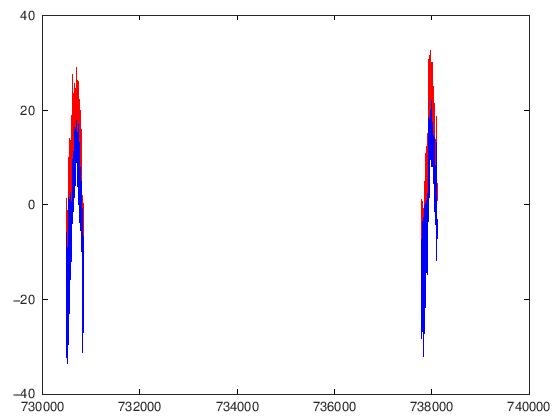

In [105]:
plot(serialday2000,maxT2000,'r-',serialday2000,minT2000,'b-',serialday2020,maxT2020,'r-',serialday2020,minT2020,'b-')

This isn't quite what we want, however. What we want is to have both years on top of each other. We'll plot the days since Jan 1st in a given year. This way, both years will overlap, which is really what we want to be able to tell the difference between the two years.

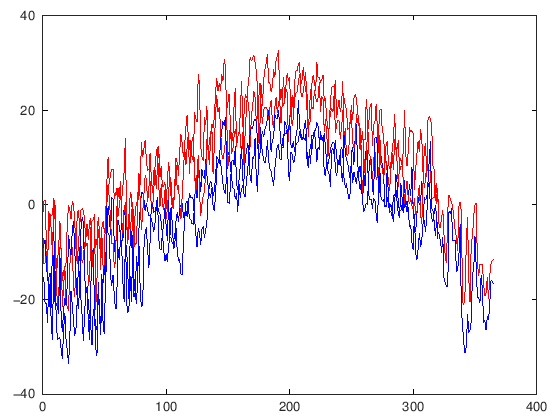

In [106]:
plot(serialday2000-serialday2000(1),maxT2000,'r-',serialday2000-serialday2000(1),minT2000,'b-',serialday2020-serialday2020(1),maxT2020,'r-',serialday2020-serialday2020(1),minT2020,'b-')

This plot is not very legible. Let's look at just the daily highs first. We'll plot  as dots so we can start to see some kind of outline or envelope of possible temperatures for any given day.

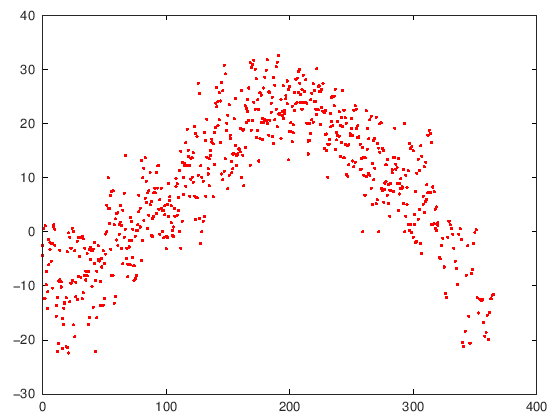

In [107]:
plot(serialday2000-serialday2000(1),maxT2000,'r.',serialday2020-serialday2020(1),maxT2020,'r.')

And now for the daily low temperatures.

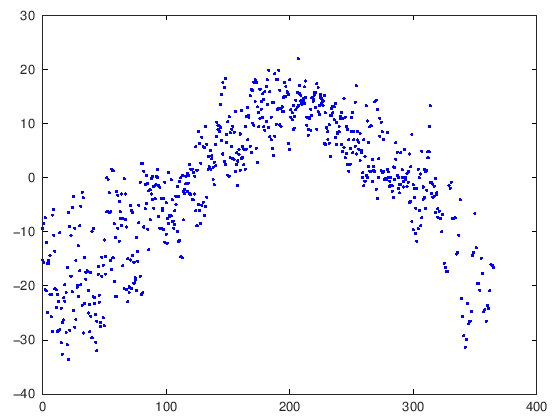

In [108]:
plot(serialday2000-serialday2000(1),minT2000,'b.',serialday2020-serialday2020(1),minT2020,'b.')

We're starting to see an envelope emerge of, statistically, what temperatures could occur on a given day. Could we now do this for a lot more years? What we're interested in is to see the variation of temperatures, historically, throughout seasons, but move away from looking at just the average temperature. We want to see what is statistically likely to happen.

**Question 1**: Look at the data extraction. The column numbers changed between the years 2000 and 2020 for the same data station and the same API call. Either:
* there's something we didn't do correctly when using the API (user error);
* there's something substandard about the data itself (poor data quality, non uniform structure);
* or the API itself is ill-formed and doesn't guarantee the data structure when it is called.

Can you figure out which the problem is? Do you know of a way to fix it? Maybe using the (more complicated) geoJSON file type would help.

**Question 2**: I consistently plotted the high temperatures in red and the low temperatures in blue, even when there was only one type of temperature in a given plot. Why do you think that is? What is the advantage of using such a colour scheme?

**Question 3**: Create a function that downloads historical climate data for a given station, treats the data so it's useful and returns only what we want, in this case the daily highs and lows.

**Question 4**: Using your function, plot the envelope of possible high/low temperatures throughout the year for your favourite place in Canada. Add all the plotting elements that you think should be there so the plot is as clear, precise and legible as possible.

## **Bonus Questions**

**Bonus 1**: Can you find the daily average temperature (the average of a day over several years, not the day's mean temperature) and compare it to the envelopes you computed. How misleading is it to look at the average temperature of a day to have an idea of how hot/cold a day should be. Do you think it makes sense for meteorologists on TV/radio programs to keep saying "We are expecting a high that's x degrees above/below the normal average today." Is it useful? How do you think that influences people's moods?

**Bonus 2**: If you use all temperatures for a number of years, you are plotting the envelope of all the temperatures that occurred. What would be a better, statistically significant metric? How would you compute the envelope of the temperatures that would occur 95% of the time on a given day? What statistical tool /test could you use?

**Bonus 3**: Using your answer from the *bonus 2* question, can you plot the 95% likelihood interval?

### End of Assignment